### Conexión MySQL y Python para obtener la información
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

In [10]:
# IMPORTAR LAS LIBRERIAS NECESARIAS
import mysql.connector
import pandas as pd

# CREO UNA CONEXION PARA LA BASE DE DATOS 'TRADES4'
cnx = mysql.connector.connect(
    user='root',
    password='250301',
    host='localhost',
    database='trades4')
cursor = cnx.cursor()

# Función para obtener los nombres de las tablas
def get_table_names(cursor):
    cursor.execute("SHOW TABLES")
    tables = cursor.fetchall()
    table_names = [table_name for (table_name,) in tables]
    return table_names

# Función para obtener y almacenar cada tabla como un DataFrame de Pandas
def get_tables_as_dataframes(cursor, table_names):
    dfs = {}
    for table_name in table_names:
        cursor.execute(f"SELECT * FROM {table_name}")
        rows = cursor.fetchall()
        df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
        dfs[table_name] = df
    return dfs

# Función para mostrar las columnas de cada tabla
def show_columns_of_tables(table_names, cursor):
    for table_name in table_names:
        cursor.execute(f"SHOW COLUMNS FROM {table_name}")
        columns = cursor.fetchall()
        column_names = [column[0] for column in columns]
        print(f"Tabla'{table_name}' - Columnas: {column_names}")

tables = get_table_names(cursor)

show_columns_of_tables(tables, cursor)

dfs = get_tables_as_dataframes(cursor, tables)

# CREAR VARIABLES GLOBALES PARA CADA DATAFRAME CON EL NOMBRE DF_TABLE_NAME
for table_name, df in dfs.items():
    globals()[f"df_{table_name}"] = df

cursor.close()
cnx.close()

Tabla'card_status' - Columnas: ['card_id', 'estado']
Tabla'companies' - Columnas: ['company_id', 'company_name', 'phone', 'email', 'country', 'website']
Tabla'credit_cards' - Columnas: ['id', 'user_id', 'iban', 'pan', 'pin', 'cvv', 'track1', 'track2', 'expiring_date']
Tabla'product_tx' - Columnas: ['transaction_id', 'product_id']
Tabla'products' - Columnas: ['id', 'product_name', 'price', 'colour', 'weight', 'warehouse_id']
Tabla'transactions' - Columnas: ['id', 'card_id', 'business_id', 'timestamp', 'amount', 'declined', 'product_ids', 'user_id', 'lat', 'longitude']
Tabla'users' - Columnas: ['id', 'name', 'surname', 'phone', 'email', 'birth_date', 'country', 'city', 'postal_code', 'address']


### Exercici 1: Mostrat una variable numèrica
Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

##### Situación: 
La empresa desea verificar qué describas las edades de los usuarios y establecer variables numericas para describirlas al maximo ya que se necesita  una estrategia para mejorar los productos y todas las plataformas para esta edad.

##### Desarrollo: 
Para conseguir este objetivo, seguiremos estos pasos:

1. Convertir 'birth_date' a formato de fecha y calcular la edad en años.
2. Obtener un resumen estadístico y mostrarlo como una tabla Markdown.
3. Configurar el estilo de los gráficos y crear un boxplot de las edades.

¿La edad de los usuarios sigue una distribución normal?
¿Hay outliers significativos en la edad?
¿Cómo varía la edad según otras variables (si las hay) en tu conjunto de datos?

|      |   Age Statistics |
|:-----|-----------------:|
| mean |         34.64    |
| std  |          6.00771 |
| min  |         23       |
| max  |         45       |

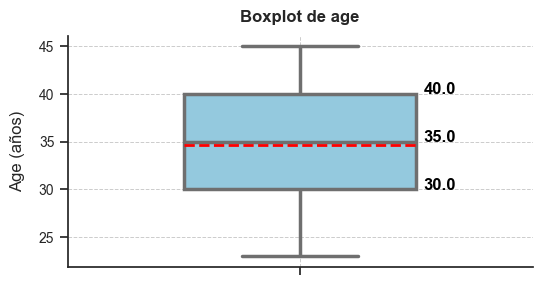

In [2]:
# Exercici 1
# IMPORTAR TODAS LAS BIBLIOTECAS QUE UTILIZAREMOS
import pandas as pd
from datetime import datetime
from tabulate import tabulate
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

# FUNCIÓN PARA CONVERTIR 'BIRTH_DATE' A FORMATO DE FECHA Y CALCULAR LA EDAD EN AÑOS

df['birth_date'] = pd.to_datetime(df['birth_date'], format='%b %d, %Y')
df['age'] = datetime.now().year - df['birth_date'].dt.year

# FUNCIÓN PARA OBTENER Y MOSTRAR UN RESUMEN ESTADÍSTICO
def display_summary_statistics(df, column):
    summary_statistics = df[column].describe().loc[['mean', 'std', 'min', 'max']]
    summary_table = tabulate(summary_statistics.to_frame(), headers=[f'{column.capitalize()} Statistics'], tablefmt='pipe')
    display(Markdown(summary_table))

# FUNCIÓN PARA CREAR UN BOXPLOT
def plot_boxplot(df, column):
    sns.set(style="ticks")
    plt.figure(figsize=(6, 3))
    ax = sns.boxplot(y=df[column], color='skyblue', width=0.5, fliersize=5, linewidth=2.5, 
                     showmeans=True, meanline=True, meanprops={"color": "red", "linewidth": 2, "linestyle": "--"})
    ax.set_title(f'Boxplot de {column}', fontsize=12, fontweight='bold', pad=10)
    ax.set_ylabel(f'{column.capitalize()} (años)', fontsize=12, labelpad=10)
    ax.grid(True, linestyle='--', linewidth=0.7)
    ax.yaxis.set_tick_params(labelsize=10)
    sns.despine(top=True, right=True)

    # ANOTAR VALORES CLAVE
    quartiles = df[column].quantile([0.25, 0.5, 0.75])
    for q, value in quartiles.items():
        ax.text(0.3, value, f'{value:.1f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
    
    plt.show()

# LLAMAR A LAS FUNCIONES DEFINIDAS

display_summary_statistics(df_users, 'age')
plot_boxplot(df_users, 'age')

### Exercici 2: Dues variables numèriques.

La empresa ha solicitado un análisis para determinar la relación entre la edad de los usuarios y su capacidad de compra, representada por la cantidad de dinero que gastan. Para llevar a cabo este análisis, es necesario seleccionar dos variables numéricas: la edad de los usuarios y el monto de las compras, que se extraerá de la tabla transactions. El objetivo es identificar patrones y tendencias que puedan informar futuras estrategias de marketing y ventas.

Para analizar esta relación, se deben realizar los siguientes pasos:

1. Calcular la edad de los usuarios a partir de sus fechas de nacimiento.
2. Unir las tablas df_users y df_transactions en función de los identificadores de usuario (user_id).
3. Obtener un resumen estadístico de las variables seleccionadas.
4. Visualizar la relación entre la edad y la capacidad de compra mediante un scatter plot (diagrama de dispersión).
   
Este análisis permitirá a la empresa comprender mejor el comportamiento de compra de sus usuarios en función de su edad y ajustar sus estrategias de manera más efectiva.

In [3]:
from tabulate import tabulate
from IPython.display import display, Markdown
from scipy.stats import pearsonr

# CONVERTIR 'BIRTH_DATE' A FORMATO DE FECHA Y CALCULAR LA EDAD EN AÑOS
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%b %d, %Y')
df['age'] = datetime.now().year - df['birth_date'].dt.year

# COMO ES UN 'OBJECT' HAGO LA CONVERSIÓN A 'FLOAT' PARA OBTENER LAS METRICAS:
df_transactions['amount'] = df_transactions['amount'].astype(float)

# Utilizo una funcón para que indique si los valores permiten tener metricas: 

def display_summary_statistics(df, column):
    try:
        summary_statistics = df[column].describe().loc[['mean', 'std', 'min', 'max']]
        print(f"{column.capitalize()} statistics displayed correctly.")
        return True
    except KeyError:
        print(f"Error: Column '{column}' does not exist in the DataFrame.")
        return False

# LLAMO A LA FUNCION PARA OBTENER LAS METRICAS DE AMBAS COLUMNAS
display_summary_statistics(df_transactions, 'amount')
display_summary_statistics(df_users, 'age')


Amount statistics displayed correctly.
Age statistics displayed correctly.


True

In [4]:
import plotly.express as px

# Fusiono los DataFrames df_transactions y df_users en df_merged.
df_merged = df_transactions.merge(df_users, left_on='user_id', right_on='id')

# Promedio de compra (amount) agrupado por edad (age) utilizando 'groupby' en df_merged.
average_purchase_by_age = df_merged.groupby('age')['amount'].mean().reset_index()

# Calcular correlación de Pearson entre edad y promedio de compra
correlation = average_purchase_by_age['age'].corr(average_purchase_by_age['amount'])
display(Markdown(f"**Correlación de Pearson entre Edad y Promedio de Compra: valor obtenido:** {correlation:.2f}"))

# Crear gráfico de dispersión con Plotly Express
fig = px.scatter(average_purchase_by_age, x='age', y='amount')

# Agregar título y etiquetas de ejes
fig.update_layout(
    title='Promedio de Compra por Edad',
    xaxis_title='Edad (años)',
    yaxis_title='Promedio de Compra (€)'
)

# Mostrar el gráfico
fig.show()

**Correlación de Pearson entre Edad y Promedio de Compra: valor obtenido:** -0.05

**Significado de la Correlación de Pearson:**   
El valor de -0.05 sugiere una correlación negativa muy débil entre la edad de los usuarios y el promedio de compra que realizan, por lo tanto esta correlación cercana a cero indica que no hay una relación lineal significativa entre la edad y el promedio de compra. Aunque la correlación es débil, el gráfico de dispersión generado previamente, permite visualizar cómo se distribuyen los promedios de compra en diferentes grupos de edad. 

**Analisis**    
No se puede establecer una tendencia clara de que a medida que la edad aumenta, el promedio de compra disminuya o viceversa. La edad de los usuarios no parece ser un predictor fuerte del promedio de compra en tu conjunto de datos. Por lo tanto, como consecuencia de este analisis puedo indicar que esta relación entre edad y cantidad de compra no será un factor determinante en el comportamiento de compra. Es necesario explorar otras variables que podrían tener una influencia más fuerte en el promedio de compra, como el nivel de ingresos, el tipo de productos comprados, o el canal de compra utilizado. 

En resumen, una correlación de Pearson de -0.05 indica una relación debil entre la edad y el promedio de compra en tu conjunto de datos. Esta información te ayuda a entender mejor las dinámicas de compra de tus usuarios y a tomar decisiones informadas basadas en datos más precisos y relevantes. 






### Exercici 3 Una variable categòrica.


Una opción común es transformar la columna declined, que indica si una transacción fue rechazada o no, en una variable categórica. Esta columna probablemente tenga valores binarios (por ejemplo, 0 y 1), lo que la hace adecuada para esta transformación.

Vamos a realizar los siguientes pasos:

Convertir la columna declined en una variable categórica.
Describir esta variable categórica.

count     587
unique      2
top         0
freq      500
Name: declined, dtype: object


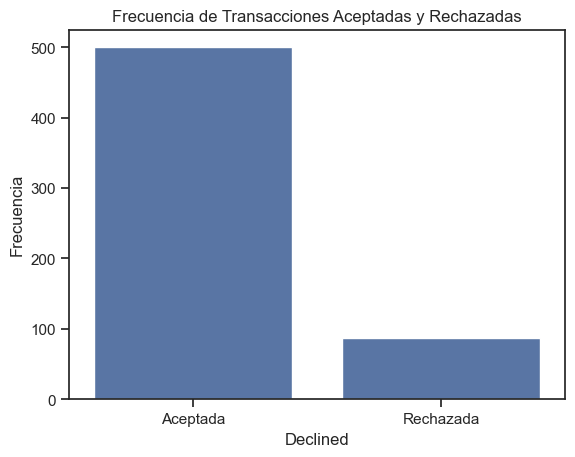

In [5]:
import pandas as pd

# Convertir la columna 'declined' a una variable categórica
df_transactions['declined'] = df_transactions['declined'].astype('category')

# Describir la variable categórica
description = df_transactions['declined'].describe()

print(description)

# Crear el gráfico de barras
sns.countplot(x='declined', data=df_transactions)
plt.title('Frecuencia de Transacciones Aceptadas y Rechazadas')
plt.xlabel('Declined')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Aceptada', 'Rechazada'])
plt.show()

### Exercici 4: Una variable categòrica i una numèrica.


Conversión a variable categórica: Se convierte la columna declined a una variable categórica.
Estadísticas descriptivas: Se muestran las estadísticas descriptivas para las variables declined y amount.
Gráficos:
Gráfico de barras: Muestra la frecuencia de transacciones aceptadas y rechazadas.
Gráfico de caja: Muestra la distribución de los montos (amount) para transacciones aceptadas y rechazadas.
Salida esperada:
Estadísticas descriptivas:

Muestra el conteo, categorías únicas, frecuencia máxima, etc. para declined.
Muestra la media, desviación estándar, valores mínimos y máximos, etc. para amount.
Gráficos:

Gráfico de barras: Dos barras mostrando cuántas transacciones fueron aceptadas y cuántas rechazadas.
Gráfico de caja: Dos cajas mostrando la distribución de los montos de las transacciones aceptadas y rechazadas.






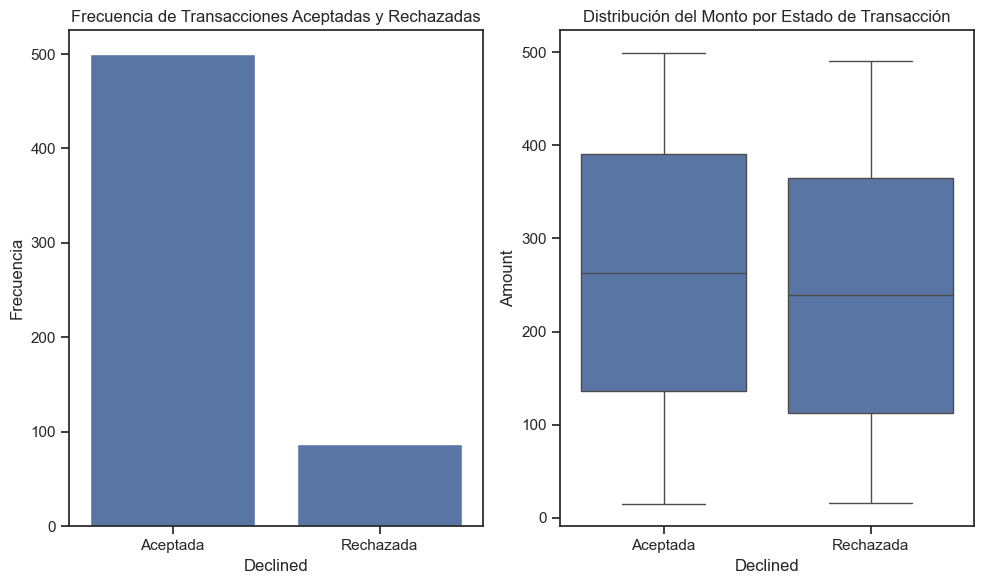

In [6]:
# Convertir 'declined' en una variable categórica
df_transactions['declined'] = df_transactions['declined'].astype('category')

# Graficar los datos
plt.figure(figsize=(10, 6))

# Gráfico de barras de la variable categórica 'declined'
plt.subplot(1, 2, 1)
sns.countplot(x='declined', data=df_transactions)
plt.title('Frecuencia de Transacciones Aceptadas y Rechazadas')
plt.xlabel('Declined')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Aceptada', 'Rechazada'])

# Gráfico de caja de la variable numérica 'amount' por la categórica 'declined'
plt.subplot(1, 2, 2)
sns.boxplot(x='declined', y='amount', data=df_transactions)
plt.title('Distribución del Monto por Estado de Transacción')
plt.xlabel('Declined')
plt.ylabel('Amount')
plt.xticks(ticks=[0, 1], labels=['Aceptada', 'Rechazada'])

plt.tight_layout()
plt.show()

### Exercici 5: Dues variables categòriques.

Para utilizar dos variables categóricas y visualizarlas en un gráfico, podemos seleccionar dos columnas con valores categóricos. En este caso, podemos utilizar declined de la tabla transactions y country de la tabla users.

1. Seleccionar las variables:   
Variables categóricas: declined de la tabla transactions y country de la tabla users.
2. Unir las tablas necesarias:  
Unimos transactions con users usando user_id.
3. Mostrar y graficar los datos.    

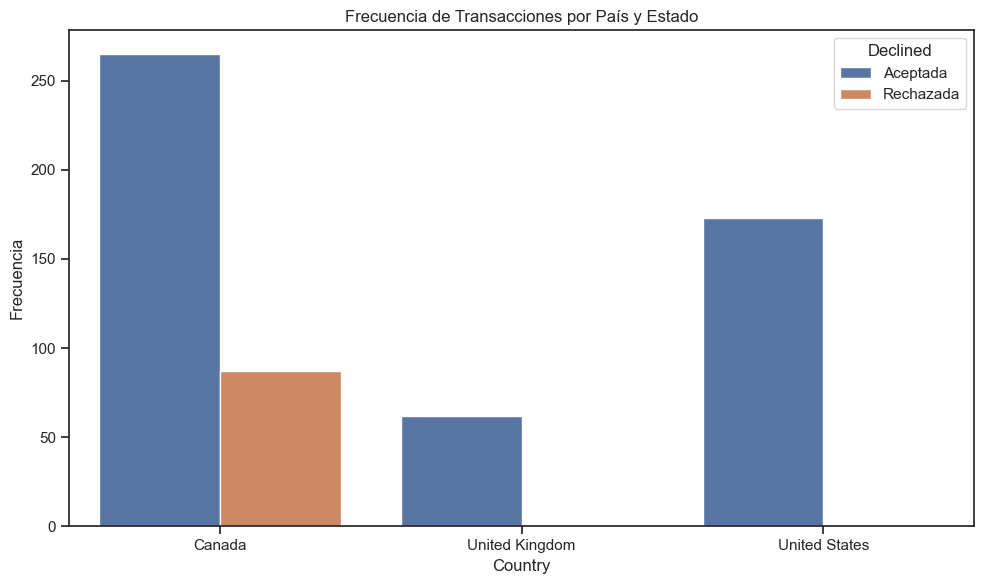

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Unir las tablas df_transactions y df_users usando user_id
merged_df = pd.merge(df_transactions, df_users, left_on='user_id', right_on='id', suffixes=('_transaction', '_user'))

# Convertir 'declined' y 'country' en variables categóricas
merged_df['declined'] = merged_df['declined'].astype('category')
merged_df['country'] = merged_df['country'].astype('category')

# Graficar los datos
plt.figure(figsize=(10, 6))

# Gráfico de conteo para las variables categóricas 'declined' y 'country'
sns.countplot(x='country', hue='declined', data=merged_df)
plt.title('Frecuencia de Transacciones por País y Estado')
plt.xlabel('Country')
plt.ylabel('Frecuencia')
plt.legend(title='Declined', labels=['Aceptada', 'Rechazada'])

plt.tight_layout()
plt.show()

Explicación:
Unión de tablas: Unimos la tabla df_transactions con la tabla df_users usando la columna user_id.
Conversión a variables categóricas: Convertimos las columnas declined y country a variables categóricas.
Estadísticas descriptivas: Mostramos las estadísticas descriptivas para las variables categóricas declined y country.
Gráfico de conteo: Creamos un gráfico de conteo que muestra la frecuencia de transacciones aceptadas y rechazadas (declined) por país (country).
Salida esperada:
Estadísticas descriptivas:

Muestra el conteo, categorías únicas, frecuencia máxima, etc. para declined y country.
Gráfico:

Gráfico de conteo: Un gráfico de barras agrupadas que muestra cuántas transacciones fueron aceptadas y rechazadas por cada país.

### Exercici 6: Tres variables.


Para trabajar con tres variables, una opción es utilizar dos variables categóricas y una numérica. En este caso, podríamos utilizar:

1. Variables categóricas:

- declined de la tabla df_transactions.
- country de la tabla df_users.

2. Variable numérica:

- amount de la tabla df_transactions.

Pasos:
1. Seleccionar las variables:
- Variables categóricas: declined y country.
-Variable numérica: amount.
2. Unir las tablas necesarias:
3. Unir df_transactions con df_users usando user_id.
4. Mostrar y graficar los datos.

       declined country      amount
count       587     587  587.000000
unique        2       3         NaN
top           0  Canada         NaN
freq        500     352         NaN
mean        NaN     NaN  256.735520
std         NaN     NaN  144.133895
min         NaN     NaN   15.050000
25%         NaN     NaN  131.115000
50%         NaN     NaN  257.440000
75%         NaN     NaN  389.900000
max         NaN     NaN  499.230000


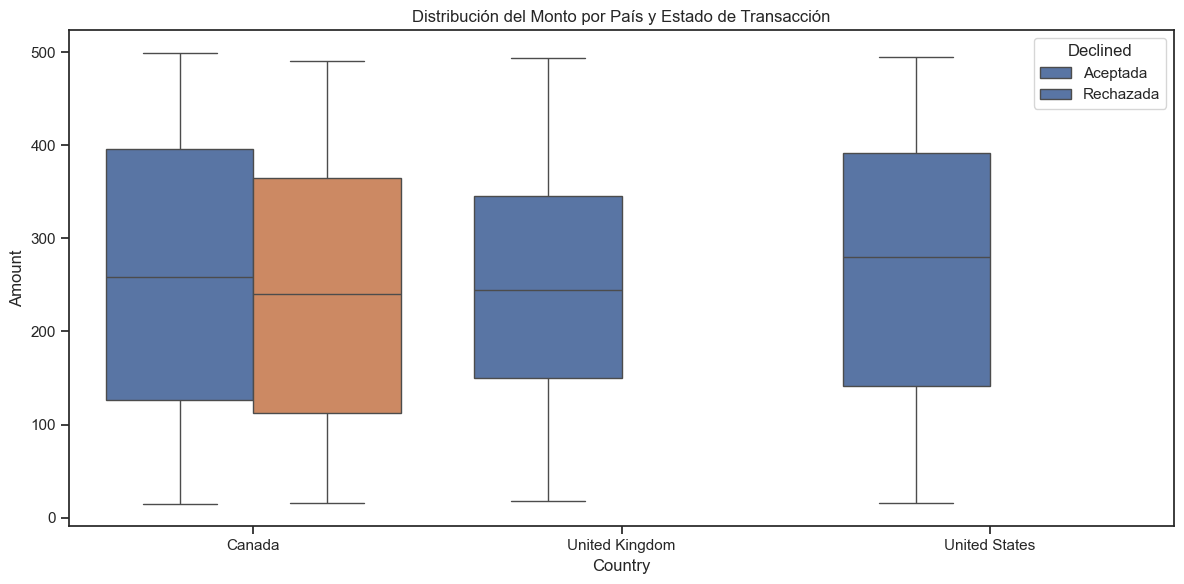

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Unir las tablas df_transactions y df_users usando user_id
merged_df = pd.merge(df_transactions, df_users, left_on='user_id', right_on='id', suffixes=('_transaction', '_user'))

# Convertir 'declined' y 'country' en variables categóricas
merged_df['declined'] = merged_df['declined'].astype('category')
merged_df['country'] = merged_df['country'].astype('category')

# Mostrar estadísticas descriptivas
print(merged_df[['declined', 'country', 'amount']].describe(include='all'))

# Graficar los datos
plt.figure(figsize=(12, 6))

# Gráfico de caja de la variable numérica 'amount' por las categóricas 'declined' y 'country'
sns.boxplot(x='country', y='amount', hue='declined', data=merged_df)
plt.title('Distribución del Monto por País y Estado de Transacción')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.legend(title='Declined', labels=['Aceptada', 'Rechazada'])

plt.tight_layout()
plt.show()

**Análisis de Transacciones por País y Estado**

Este análisis muestra cómo se distribuyen los montos de las transacciones según el estado de la transacción (`declined`) y el país del usuario (`country`).

**Datos Utilizados**

Se utilizaron dos tablas: `df_transactions` y `df_users`.

**Proceso de Análisis**

1. **Unión de tablas**: Unimos la tabla `df_transactions` con la tabla `df_users` usando la columna `user_id`.

    ```python
    merged_df = pd.merge(df_transactions, df_users, left_on='user_id', right_on='id', suffixes=('_transaction', '_user'))
    ```

2. **Conversión a variables categóricas**: Convertimos las columnas `declined` y `country` a variables categóricas.

    ```python
    merged_df['declined'] = merged_df['declined'].astype('category')
    merged_df['country'] = merged_df['country'].astype('category')
    ```

3. **Estadísticas descriptivas**: Mostramos las estadísticas descriptivas para las variables categóricas `declined` y `country`, y la variable numérica `amount`.

    ```python
    print(merged_df[['declined', 'country', 'amount']].describe(include='all'))
    ```
    **Declined (Transacción aceptada/rechazada)**:
    - **count**: 587 transacciones en total.
    - **unique**: 2 valores únicos (aceptada o rechazada).
    - **top**: El valor más frecuente es `0` (aceptada).
    - **freq**: El valor `0` (aceptada) aparece 500 veces.

    **Country (País del usuario)**:
    - **count**: 587 transacciones en total.
    - **unique**: 3 países diferentes.
    - **top**: El país más frecuente es `Canada`.
    - **freq**: `Canada` aparece 352 veces.

    **Amount (Monto de la transacción)**:
    - **count**: 587 montos de transacciones.
    - **mean**: El monto promedio de las transacciones es de 256.74.
    - **std**: La desviación estándar del monto es 144.13, indicando variabilidad en los montos.
    - **min**: El monto mínimo es 15.05.
    - **25%**: El 25% de las transacciones tienen un monto menor a 131.12.
    - **50%**: La mediana del monto es 257.44.
    - **75%**: El 75% de las transacciones tienen un monto menor a 389.90.
    - **max**: El monto máximo es 499.23.






4. **Gráfico de caja**: Creamos un gráfico de caja que muestra la distribución de los montos (`amount`) de las transacciones por país (`country`) y estado de transacción (`declined`).

    ```python
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='country', y='amount', hue='declined', data=merged_df)
    plt.title('Distribución del Monto por País y Estado de Transacción')
    plt.xlabel('Country')
    plt.ylabel('Amount')
    plt.legend(title='Declined', labels=['Aceptada', 'Rechazada'])
    plt.tight_layout()
    plt.show()
    ```

**Salida Esperada**

1. **Estadísticas descriptivas**: 
    - Muestra el conteo, categorías únicas, frecuencia máxima, etc. para `declined` y `country`.
    - Muestra la media, desviación estándar, valores mínimos y máximos, etc. para `amount`.

2. **Gráfico**:
    - **Gráfico de caja**: Muestra la distribución del monto de las transacciones (`amount`) para cada combinación de país (`country`) y estado de transacción (`declined`).

**Resultados**

El gráfico de caja muestra cómo varían los montos de las transacciones aceptadas y rechazadas en diferentes países. Esto puede ayudar a identificar patrones y diferencias en el comportamiento de transacciones entre países y estados de transacción.

### Exercici 7: graficas un pairplot

Index(['country_trans', 'country_comp', 'amount', 'age'], dtype='object')


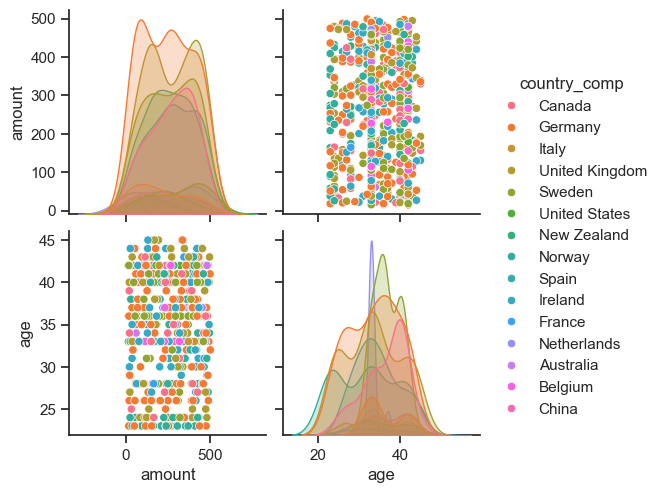

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Supongamos que ya tienes cargados los DataFrames df_companies, df_credit_cards, df_transactions, df_users

# Unir las tablas df_transactions y df_credit_cards
merged_df = pd.merge(df_transactions, df_credit_cards, left_on='card_id', right_on='id', suffixes=('_trans', '_card'))

# Unir df_users al merged_df
merged_df2 = pd.merge(merged_df, df_users, left_on='user_id_trans', right_on='id', suffixes=('_trans', '_user'))

# Si también necesitas incluir df_companies
merged_df3 = pd.merge(merged_df2, df_companies, left_on='business_id', right_on='company_id', how='left', suffixes=('_trans', '_comp'))

# Calcular la edad a partir de la fecha de nacimiento
merged_df3['birth_date'] = pd.to_datetime(merged_df3['birth_date'], format='%b %d, %Y')  # Convertir a tipo datetime si no está ya convertida
merged_df3['age'] = datetime.now().year - merged_df3['birth_date'].dt.year  # Calcular la edad en años

# Definir variables categóricas y numéricas
categorical_columns = ['country_trans', 'country_comp']  # Ejemplo de columnas categóricas
numeric_columns = ['amount', 'age']  # Incluir la edad como una columna numérica

# Filtrar el DataFrame para incluir solo las columnas relevantes y eliminar filas con NaN
plot_data = merged_df3[categorical_columns + numeric_columns].dropna()

# Imprimir las columnas seleccionadas
print(plot_data.columns)

# Crea el pairplot diferenciando por la columna 'country_comp'
sns.pairplot(plot_data, hue='country_comp', vars=['amount', 'age'])
plt.show()

